In [2]:
main_accent_colour = "#b366ff"
dim_colour="darkgrey"
main_palette = ["#FBE5C0", "#DD9A30", "#F88379", "#FF6FC2", "purple", "#D086F6", "#B0D2C2", "#4C5D70", "#6FA2CE", "#382D24", "#3ACF3A", "#7D7D00"]

In [3]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

train_dir = './train'
test_dir = './test'

row = 48
col = 48
classes = len(os.listdir('./train'))

In [4]:
train_count = []
print("Train Set :")
for folder in os.listdir(train_dir) :
    print(folder, "folder contains\t\t", len(os.listdir(train_dir+"/"+folder)), "image")
    train_count.append(len(os.listdir(train_dir+"/"+folder)))
    
print()

test_count = []
print("Test Set :")
for folder in os.listdir(test_dir) :
    print(folder, "folder contains\t\t", len(os.listdir(test_dir+"/"+folder)), "images")
    test_count.append(len(os.listdir(test_dir+"/"+folder)))

Train Set :
angry folder contains		 3995 image
disgust folder contains		 436 image
fear folder contains		 4097 image
happy folder contains		 7214 image
neutral folder contains		 4965 image
sad folder contains		 4830 image
surprise folder contains		 3171 image

Test Set :
angry folder contains		 958 images
disgust folder contains		 111 images
fear folder contains		 1024 images
happy folder contains		 1774 images
neutral folder contains		 1233 images
sad folder contains		 1247 images
surprise folder contains		 831 images


C:\Users\leosh\anaconda3\envs\project\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


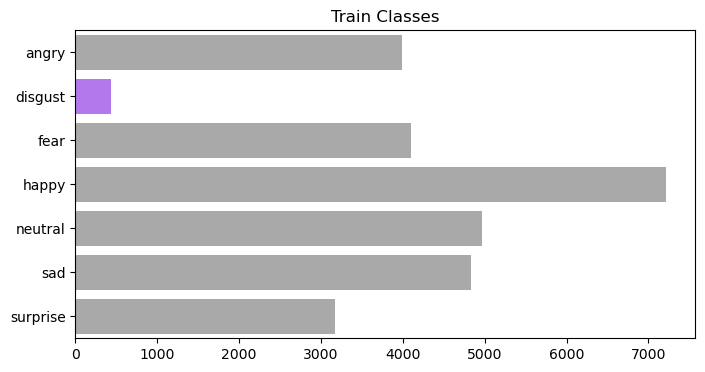

C:\Users\leosh\anaconda3\envs\project\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


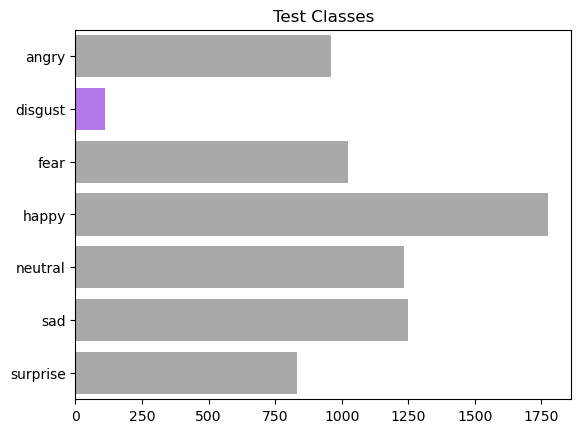

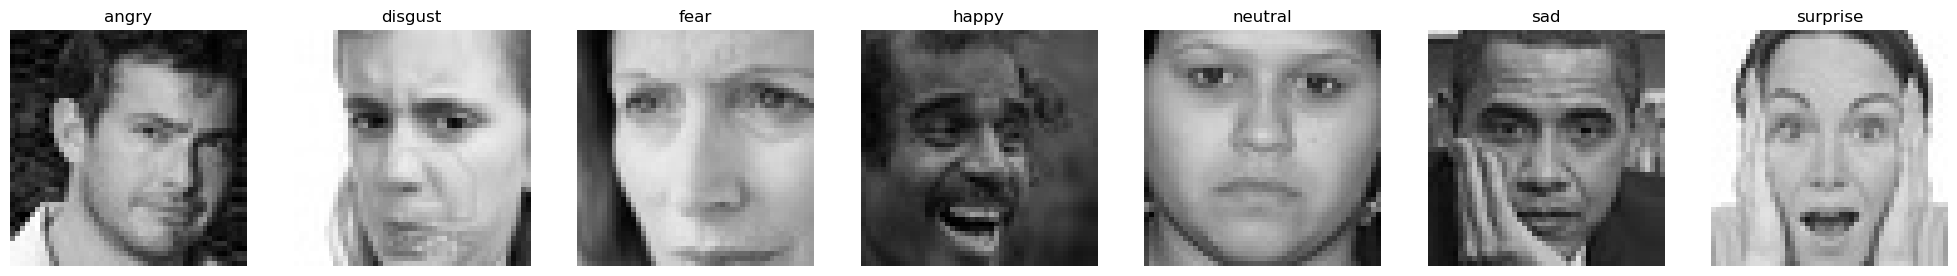

In [5]:
import seaborn as sns

vals = ["disgust"]
palette = {c: dim_colour if c not in vals else main_accent_colour for c in os.listdir(train_dir)}

plt.figure(figsize=(8,4))

ax = sns.barplot(y=os.listdir(train_dir),
                 x=train_count,
                 palette=palette,
                 orientation="horizontal",
).set(title='Train Classes')

plt.show()

print()

ax = sns.barplot(y=os.listdir(test_dir),
                 x=test_count,
                 palette=palette,
                 orientation="horizontal",
).set(title='Test Classes')

plt.show()

print()

plt.figure(figsize=(25,25))

i = 1
for folder in os.listdir(train_dir):
    
    img = load_img((train_dir +"/"+ folder +'/'+ os.listdir(train_dir +"/"+ folder)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(folder)
    plt.axis('off')
    i += 1
    
plt.show()

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 28708 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [8]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras import regularizers
from tensorflow.keras.optimizers import Adam

model = Sequential()

# First Convolutional Block
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(48, 48, 1), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second Convolutional Block
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Third Convolutional Block
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

# Flattening
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))  # 7 for the number of emotions

model.compile(optimizer=Adam(learning_rate=0.0001, decay=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       7

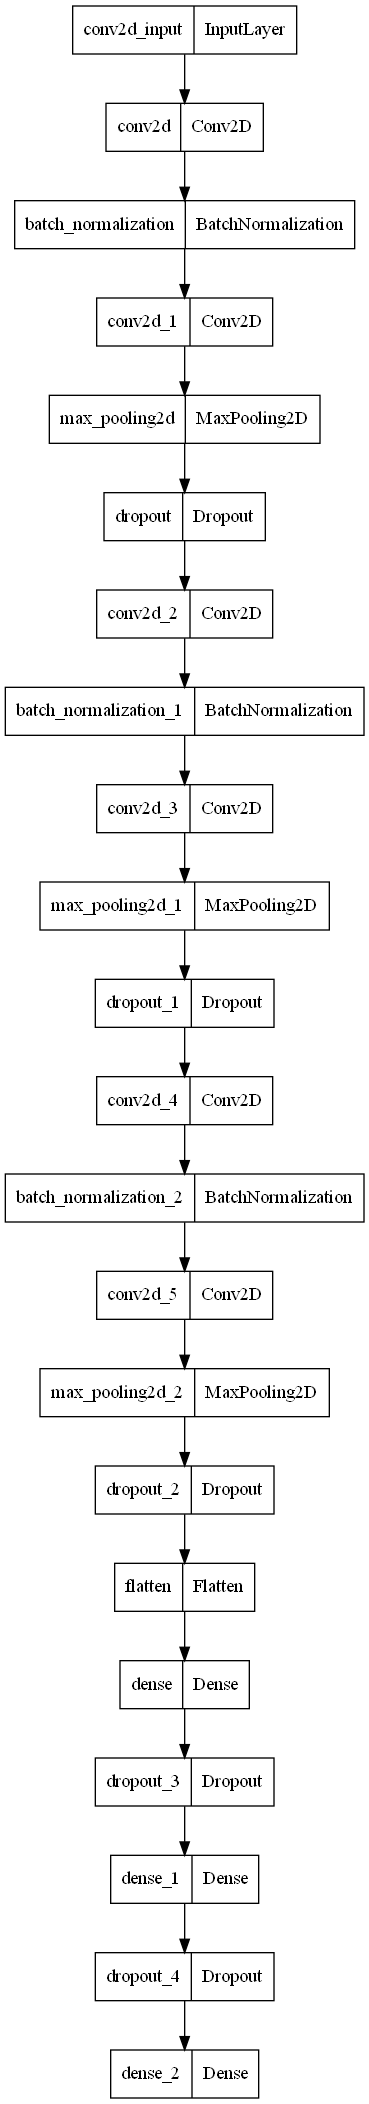

In [9]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_layer_names=True)

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("best_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=6, min_lr=0.0001, mode='max')

callbacks_list = [checkpoint, early_stopping, reduce_lr]

In [11]:
batch_size = 64
epochs = 150
steps_per_epoch = 358
validation_steps = 89

history = model.fit(
    training_set,
    validation_data=(test_set),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=callbacks_list,
    verbose=1)

Epoch 1/150
449/449 [==============================] - ETA: 0s - loss: 1.9773 - accuracy: 0.2071
Epoch 1: val_accuracy improved from -inf to 0.24714, saving model to best_model.keras
449/449 [==============================] - 200s 443ms/step - loss: 1.9773 - accuracy: 0.2071 - val_loss: 1.8102 - val_accuracy: 0.2471 - lr: 1.0000e-04
Epoch 2/150
 14/449 [..............................] - ETA: 2:59 - loss: 1.8633 - accuracy: 0.2009

KeyboardInterrupt: 

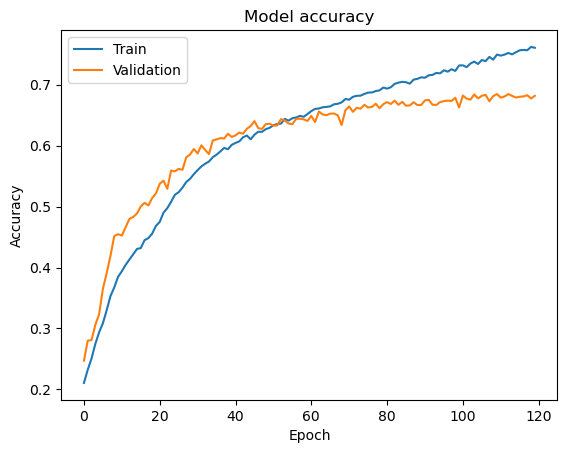

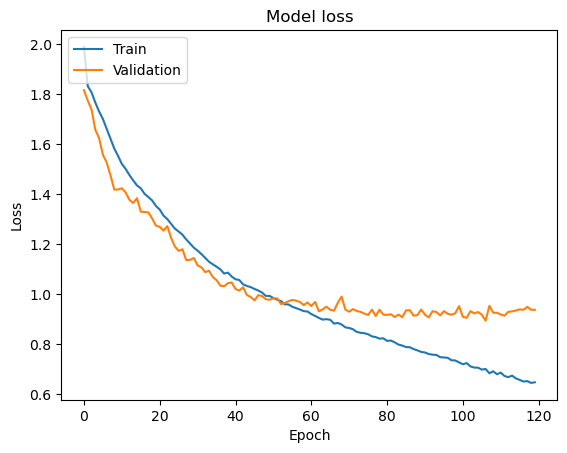

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [41]:
test_loss, test_accuracy = model.evaluate(test_set, verbose=1)
print(f'Test Loss: {test_loss}\nTest Accuracy: {test_accuracy}')

113/113 [==============================] - 16s 139ms/step - loss: 0.9375 - accuracy: 0.6817
Test Loss: 0.9375383853912354
Test Accuracy: 0.6816661953926086


In [37]:
model.save("model.keras")

113/113 [==============================] - 14s 121ms/step
Confusion Matrix
[[ 99   9  95 262 203 181 109]
 [ 14   0   8  24  22  31  12]
 [114  13 100 236 233 195 133]
 [204  15 150 454 387 362 202]
 [148  17 120 281 280 233 154]
 [147  12 129 295 254 252 158]
 [102   9  79 188 171 187  95]]
Classification Report
              precision    recall  f1-score   support

       angry       0.12      0.10      0.11       958
     disgust       0.00      0.00      0.00       111
        fear       0.15      0.10      0.12      1024
       happy       0.26      0.26      0.26      1774
     neutral       0.18      0.23      0.20      1233
         sad       0.17      0.20      0.19      1247
    surprise       0.11      0.11      0.11       831

    accuracy                           0.18      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.18      0.18      0.18      7178



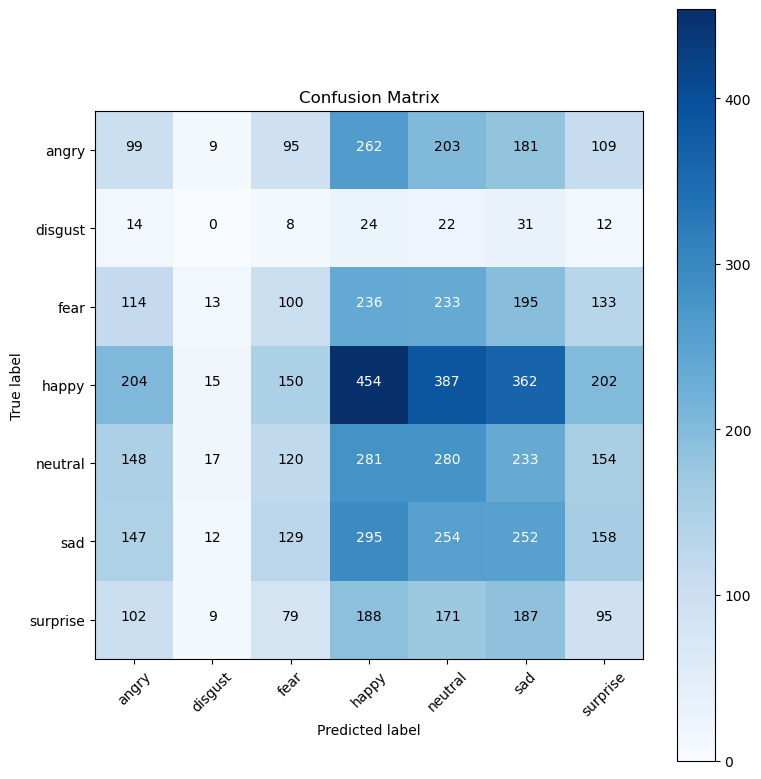

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools

y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

cm_test = confusion_matrix(test_set.classes, y_pred)
print('Confusion Matrix')
print(cm_test)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(test_set.classes, y_pred, target_names=target_names))

# Plotting the confusion matrix with numbers
plt.figure(figsize=(8,8))
plt.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Blues)  # Using a color map for better visibility
plt.colorbar()

tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)

# Labeling the axes
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Looping over data dimensions and creating text annotations.
thresh = cm_test.max() / 2.  # Threshold for changing text color for better visibility
for i, j in itertools.product(range(cm_test.shape[0]), range(cm_test.shape[1])):
    plt.text(j, i, format(cm_test[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm_test[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

113/113 [==============================] - 14s 123ms/step
Confusion Matrix
[[110  12 119 239 185 190 103]
 [ 10   1   6  35  23  28   8]
 [134   9 118 268 183 197 115]
 [238  23 195 436 328 349 205]
 [160  11 138 310 234 250 130]
 [155  11 141 337 233 226 144]
 [116   4  95 195 165 167  89]]
Classification Report
              precision    recall  f1-score   support

       angry       0.12      0.11      0.12       958
     disgust       0.01      0.01      0.01       111
        fear       0.15      0.12      0.13      1024
       happy       0.24      0.25      0.24      1774
     neutral       0.17      0.19      0.18      1233
         sad       0.16      0.18      0.17      1247
    surprise       0.11      0.11      0.11       831

    accuracy                           0.17      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.17      0.17      7178



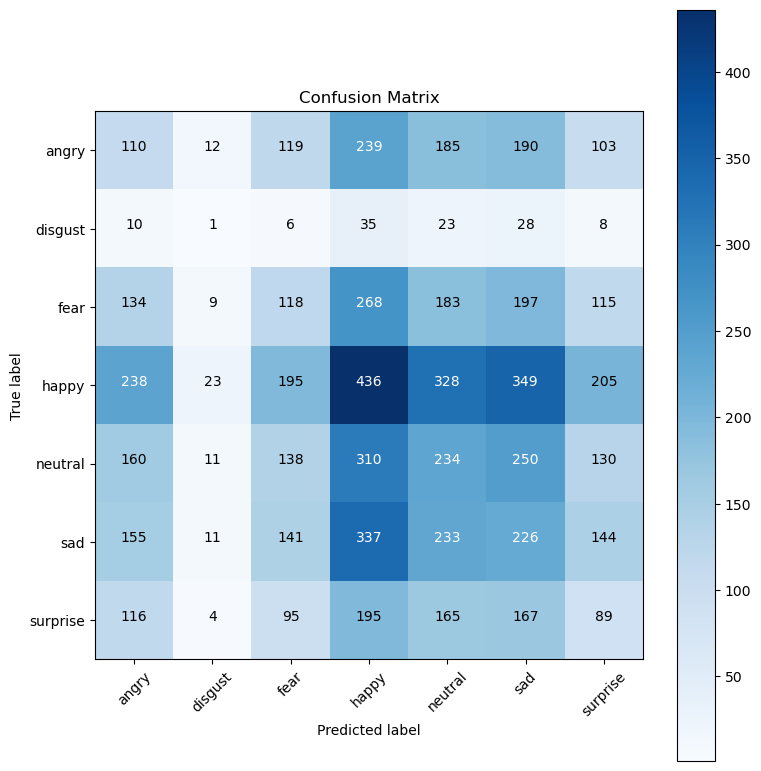

In [9]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import itertools

# Load the saved model
best_model = load_model("best_model.keras")
y_pred = best_model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

cm_test = confusion_matrix(test_set.classes, y_pred)
print('Confusion Matrix')
print(cm_test)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(test_set.classes, y_pred, target_names=target_names))

# Plotting the confusion matrix with numbers
plt.figure(figsize=(8,8))
plt.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Blues)  # Using a color map for better visibility
plt.colorbar()

tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)

# Labeling the axes
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Looping over data dimensions and creating text annotations.
thresh = cm_test.max() / 2.  # Threshold for changing text color for better visibility
for i, j in itertools.product(range(cm_test.shape[0]), range(cm_test.shape[1])):
    plt.text(j, i, format(cm_test[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm_test[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [42]:
test_loss, test_accuracy = best_model.evaluate(test_set, verbose=1)
print(f'Test Loss: {test_loss}\nTest Accuracy: {test_accuracy}')

113/113 [==============================] - 15s 134ms/step - loss: 0.9255 - accuracy: 0.6846
Test Loss: 0.9254807829856873
Test Accuracy: 0.6845918297767639


In [12]:
from tensorflow.keras.models import load_model
# Load the saved model
best_model = load_model("best_model_TL.keras")
test_loss, test_accuracy = best_model.evaluate(test_set, verbose=1)
print(f'Test Loss: {test_loss}\nTest Accuracy: {test_accuracy}')

 59/113 [==============>...............] - ETA: 6s - loss: 3.6111 - accuracy: 0.3583

KeyboardInterrupt: 

In [41]:
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
import os

INPUT_PATH = "./test"
EMOTIONS = [f.name for f in os.scandir(INPUT_PATH) if f.is_dir()]
IMAGE_SIZE = (48, 48)

print(EMOTIONS)

def image_generator(input_path, emotions, image_size):
    for index, emotion in enumerate(emotions):
        for filename in os.listdir(os.path.join(input_path, emotion)):
            img = cv2.imread(os.path.join(input_path, emotion, filename))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, image_size)
            img = img / 255.0  # Normalize
            img = np.expand_dims(img, -1)
            yield img, index

def load_images(input_path, emotions, image_size):
    X, y = [], []
    for img, label in image_generator(input_path, emotions, image_size):
        X.append(img)
        y.append(label)
    X = np.array(X)
    y = to_categorical(np.array(y))
    return X, y

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [42]:
# Load the images 1
X, y = load_images(INPUT_PATH, EMOTIONS, IMAGE_SIZE)
input_shape = X[0].shape
print(input_shape)

(48, 48, 1)


In [7]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import itertools

# Load the saved model
best_model = load_model("best_model.keras")
y_pred = best_model.predict(X)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}
y_test_indices = np.argmax(y, axis=1)

cm_test = confusion_matrix(y_test_indices, y_pred)
print('Confusion Matrix')
print(cm_test)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(y_test_indices, y_pred, target_names=target_names))

# Plotting the confusion matrix with numbers
plt.figure(figsize=(8,8))
plt.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Blues)  # Using a color map for better visibility
plt.colorbar()

tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)

# Labeling the axes
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Looping over data dimensions and creating text annotations.
thresh = cm_test.max() / 2.  # Threshold for changing text color for better visibility
for i, j in itertools.product(range(cm_test.shape[0]), range(cm_test.shape[1])):
    plt.text(j, i, format(cm_test[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm_test[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

NameError: name 'X' is not defined